In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_excel('Canada.xlsx' , skiprows=20 , skipfooter=2, sheet_name='Canada by Citizenship')

In [4]:
cols_to_drop = ['Type', 'Coverage', 'AREA' , 'REG' , 'DEV'] #list of unwanted cols
df.drop(columns= cols_to_drop, inplace=True) #dropping the columns
years = range(1980,2014)          #list of years 1980-2013
df.rename({
    'OdName':'Country',
    'AreaName':'Continet',
    'RegName':'Region',
    'DevName':'Status',
}, axis=1, inplace=True)     #renaming the columns
df.set_index('Country',inplace=True) #mmaking country as index
df['Total'] = df[years].sum(axis=1) #adding new column from existing data
df.head(3) #show output first 3 rows

,Continet,Region,Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [5]:
df.head(10)

,Continet,Region,Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [6]:
df.sort_values(by='Total' , inplace=True , ascending=False)
df.head(10)

,Continet,Region,Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


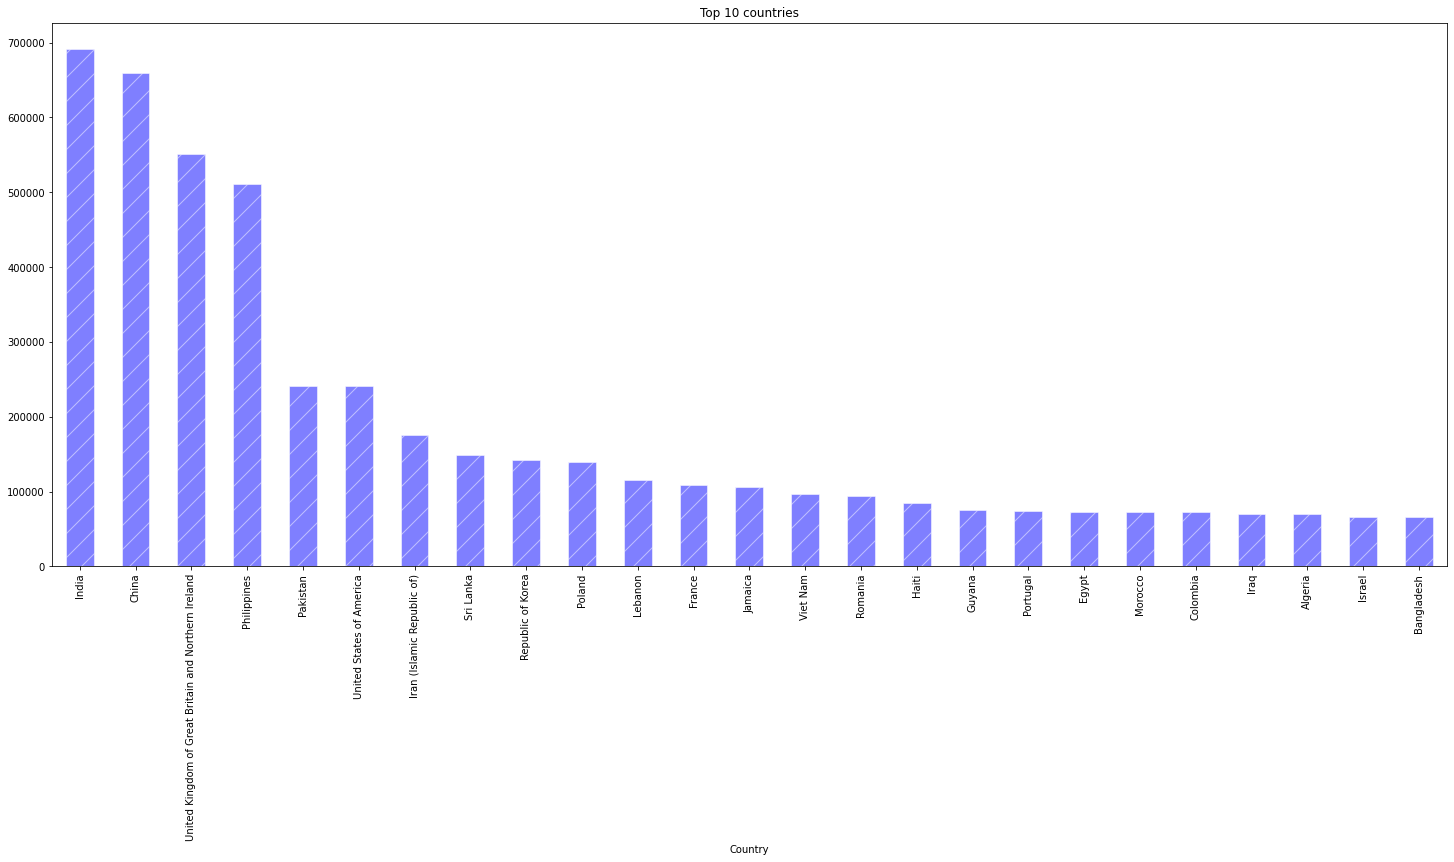

In [7]:
df.head(25)['Total'].plot(kind='bar',figsize=(25,10),title='Top 10 countries',
 color='blue' , alpha=.5, edgecolor='white' , hatch='/')
plt.savefig('Top_25_countries_with_immigration.jpg', bbox_inches='tight')



In [8]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000001BED031A850>
File:           c:\users\asus\miniconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot


In [9]:
countries = ['India', 'China','Japan']
df.loc[countries,years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
Japan,701,756,598,309,246,198,248,422,324,494,...,973,1067,1212,1250,1284,1194,1168,1265,1214,982


<AxesSubplot: >

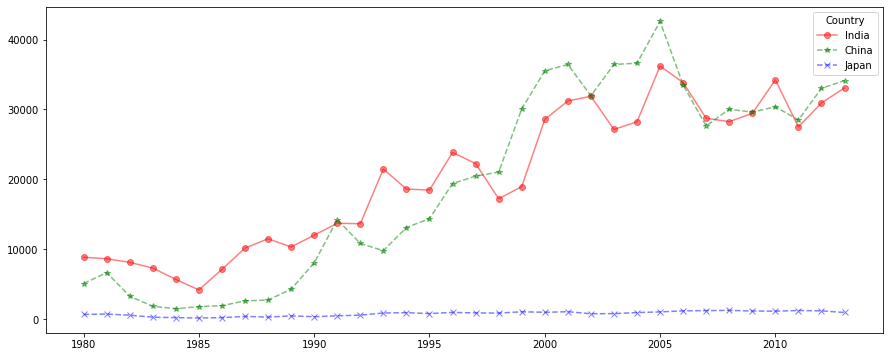

In [10]:
df.loc[countries,years].T.plot(kind='line', figsize=(15,6), style=['ro-','g*--','bx--'],alpha=.5)

In [11]:
px.funnel(df.head(),x=df.head().index,y=[1980,1990,2000,2010])

visualization


#line plots


In [12]:
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<AxesSubplot: title={'center': 'Immigration of Japan To Cananda(1980-2013'}, xlabel='Years', ylabel='No. of People'>

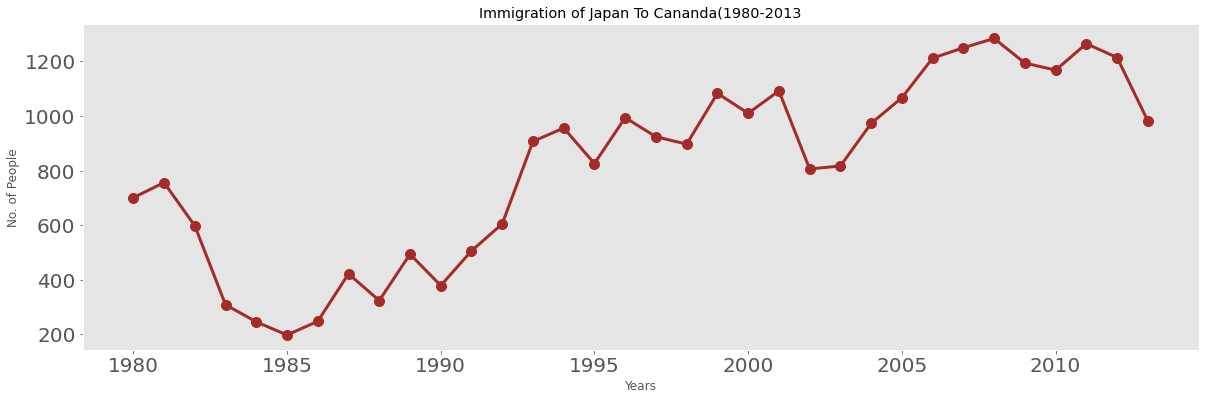

In [13]:
df.loc['Japan' , years].plot(linewidth=3, color='brown', marker='o', markersize=10,
 figsize=(20,6), xlabel='Years', ylabel='No. of People', fontsize=20, grid=False,title='Immigration of Japan To Cananda(1980-2013' )

area plots

<AxesSubplot: >

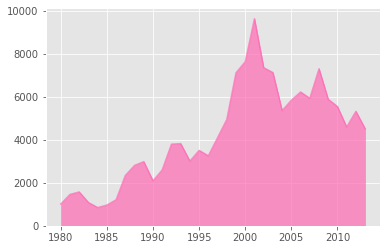

In [14]:
df.loc['Republic of Korea',years].plot(kind='area',alpha=.7, color='hotpink')

<AxesSubplot: >

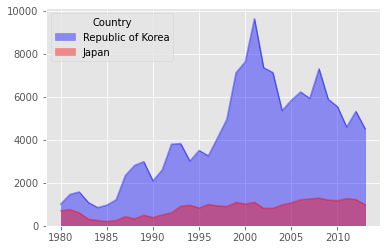

In [15]:
countries = ['Republic of Korea', 'Japan']
colors=['blue','red']
df.loc[countries,years].T.plot(kind='area',alpha=.4,color=colors,stacked=False)

array([[<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

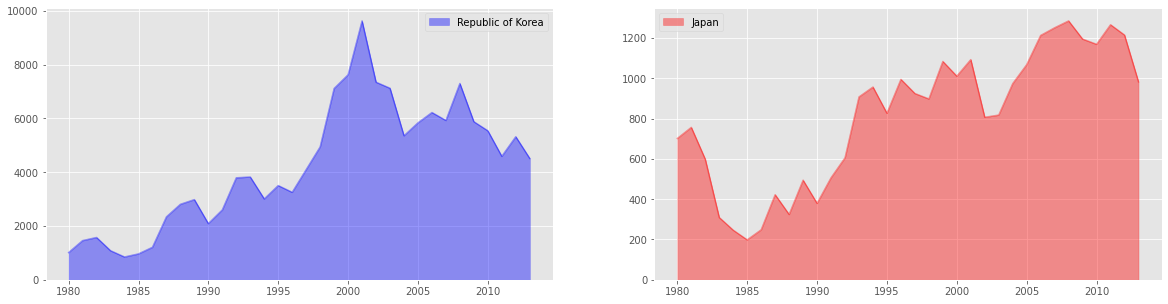

In [16]:
df.loc[countries, years].T.plot(kind='area',alpha=.4,color=colors,stacked=False,
     subplots=True, figsize=(20,5), layout=(1,2))

In [17]:
df.head(5)

,Continet,Region,Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


<AxesSubplot: ylabel='Total'>

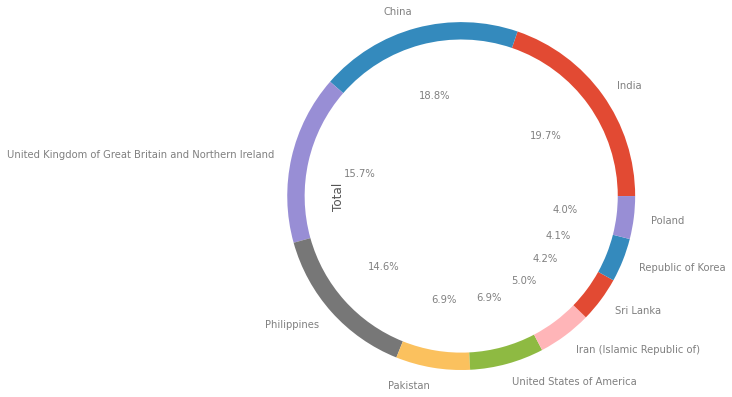

In [18]:
#colors=[]
df['Total'].head(10).plot(kind='pie',radius=2,
autopct='%.1f%%', wedgeprops={'width':.2} , textprops={'color':'grey'})

<AxesSubplot: ylabel='Total'>

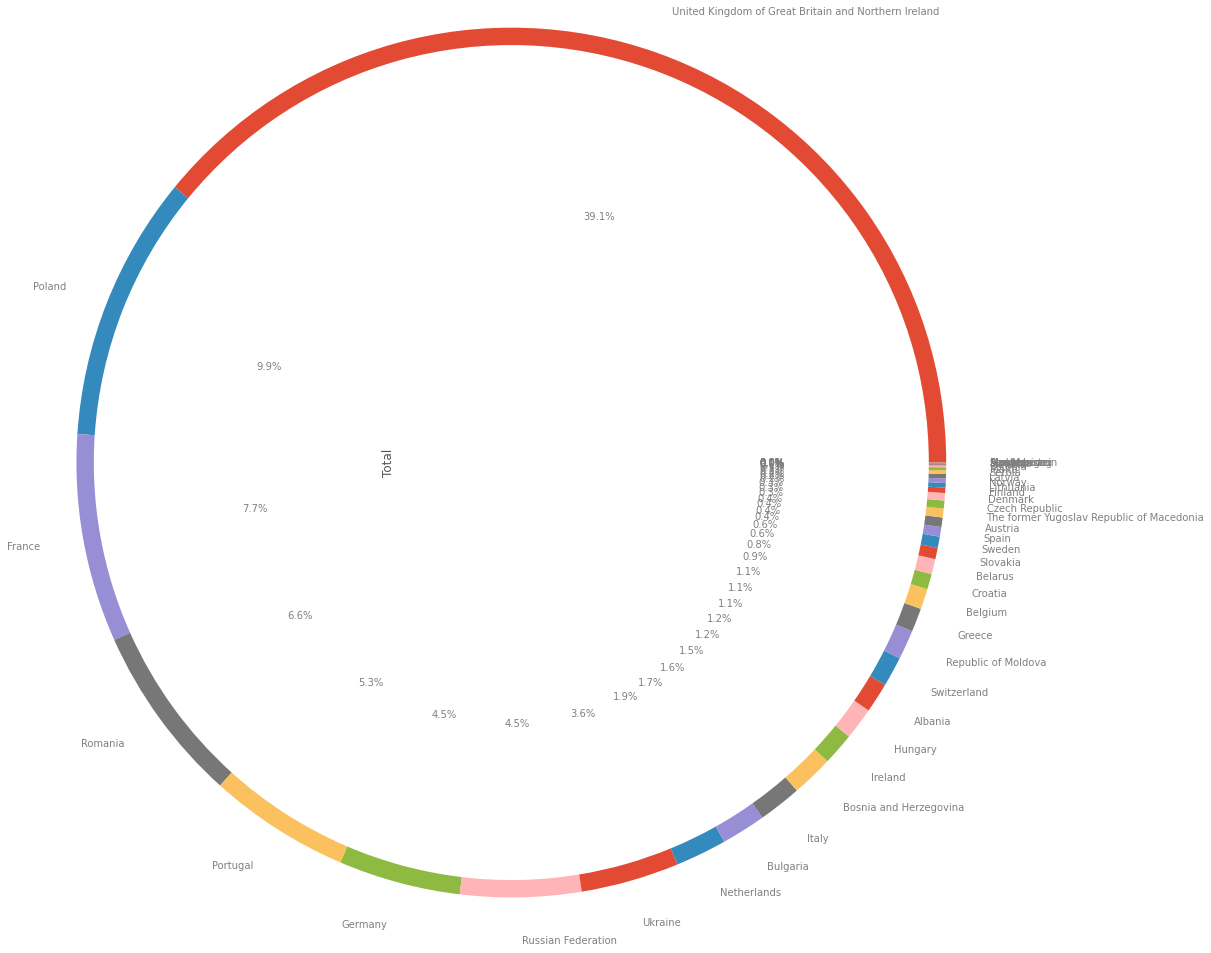

In [19]:
df[df['Continet']=='Europe']['Total'].plot(kind='pie',radius=5,
autopct='%.1f%%', wedgeprops={'width':.2} , textprops={'color':'grey'})

<AxesSubplot: ylabel='Total'>

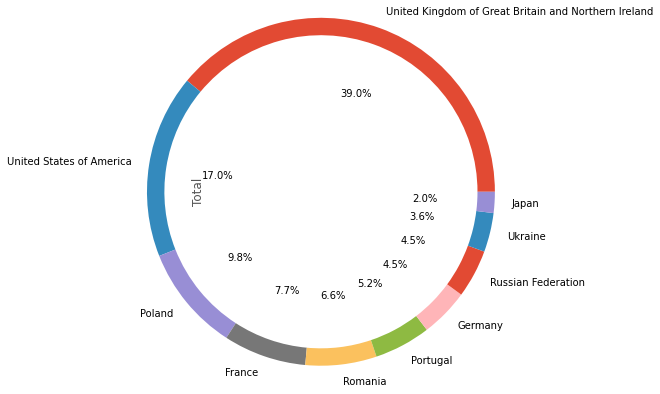

In [20]:
df[df['Status']== 'Developed regions'].head(10)['Total'].plot(kind='pie',radius=2,
    autopct='%.1f%%', wedgeprops={'width':.2} , textprops={'color':'black'}
)


In [36]:
cdf = df.groupby(by='Continet').sum()
cdf

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continet,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [38]:
df.groupby('Continet')[list(years)].agg(['median','mean'])

1980                 1981               \
                                 median         mean  median         mean   
Continet                                                                    
Africa                              5.0    73.166667     4.5    80.796296   
Asia                               12.0   633.163265     6.0   700.285714   
Europe                             17.0   924.651163    20.0  1041.906977   
Latin America and the Caribbean   114.0   396.393939   117.0   461.060606   
Northern America                 4689.0  4689.000000  5015.0  5015.000000   
Oceania                             0.0   138.714286     1.0   131.357143   

                                   1982                 1983               \
                                 median         mean  median         mean   
Continet                                                                    
Africa                              6.0    70.722222     3.5    49.462963   
Asia                               16.0   616.612245    16.0   504.000000   
Europe                             10.0   993.488372     9.0   572.976744   
Latin America and the Caribbean   146.0   508.151515   124.0   467.484848   
Northern America                 4537.0  4537.000000  3550.0  3550.000000   
Oceania                             0.0   119.642857     0.5    72.714286   

                                   1984               ...    2009  \
                                 median         mean  ...  median   
Continet                                              ...           
Africa                              6.5    48.870370  ...   163.0   
Asia                                7.0   556.612245  ...   431.0   
Europe                             11.0   518.302326  ...   167.0   
Latin America and the Caribbean   142.0   414.484848  ...   325.0   
Northern America                 3330.5  3330.500000  ...  4497.5   
Oceania                             0.5    62.714286  ...     1.0   

                                                2010                 2011  \
                                        mean  median         mean  median   
Continet                                                                    
Africa                            639.518519   182.0   757.259259   151.5   
Asia                             2886.408163   556.0  3343.775510   381.0   
Europe                            815.767442   168.0   777.325581   135.0   
Latin America and the Caribbean   814.151515   340.0   873.272727   278.0   
Northern America                 4497.500000  4071.0  4071.000000  3838.5   
Oceania                           132.857143     0.0   131.000000     0.0   

                                                2012                 2013  \
                                        mean  median         mean  median   
Continet                                                                    
Africa                            656.314815   206.5   705.240741   203.5   
Asia                             2997.836735   296.0  3106.489796   288.0   
Europe                            622.744186   173.0   678.534884   201.0   
Latin America and the Caribbean   844.121212   291.0   823.424242   345.0   
Northern America                 3838.500000  3946.0  3946.000000  4251.5   
Oceania                           110.571429     1.0   119.928571     0.5   

                                              
                                        mean  
Continet                                      
Africa                            713.759259  
Asia                             3164.795918  
Europe                            667.232558  
Latin America and the Caribbean   756.060606  
Northern America                 4251.500000  
Oceania                           126.785714  

[6 rows x 68 columns]

In [39]:
df.groupby('Continet')[list(years)].agg(['median','mean','count'])

1980                       1981  \
                                 median         mean count  median   
Continet                                                             
Africa                              5.0    73.166667    54     4.5   
Asia                               12.0   633.163265    49     6.0   
Europe                             17.0   924.651163    43    20.0   
Latin America and the Caribbean   114.0   396.393939    33   117.0   
Northern America                 4689.0  4689.000000     2  5015.0   
Oceania                             0.0   138.714286    14     1.0   

                                                      1982                     \
                                        mean count  median         mean count   
Continet                                                                        
Africa                             80.796296    54     6.0    70.722222    54   
Asia                              700.285714    49    16.0   616.612245    49   
Europe                           1041.906977    43    10.0   993.488372    43   
Latin America and the Caribbean   461.060606    33   146.0   508.151515    33   
Northern America                 5015.000000     2  4537.0  4537.000000     2   
Oceania                           131.357143    14     0.0   119.642857    14   

                                   1983  ...  2010    2011                     \
                                 median  ... count  median         mean count   
Continet                                 ...                                    
Africa                              3.5  ...    54   151.5   656.314815    54   
Asia                               16.0  ...    49   381.0  2997.836735    49   
Europe                              9.0  ...    43   135.0   622.744186    43   
Latin America and the Caribbean   124.0  ...    33   278.0   844.121212    33   
Northern America                 3550.0  ...     2  3838.5  3838.500000     2   
Oceania                             0.5  ...    14     0.0   110.571429    14   

                                   2012                       2013  \
                                 median         mean count  median   
Continet                                                             
Africa                            206.5   705.240741    54   203.5   
Asia                              296.0  3106.489796    49   288.0   
Europe                            173.0   678.534884    43   201.0   
Latin America and the Caribbean   291.0   823.424242    33   345.0   
Northern America                 3946.0  3946.000000     2  4251.5   
Oceania                             1.0   119.928571    14     0.5   

                                                    
                                        mean count  
Continet                                            
Africa                            713.759259    54  
Asia                             3164.795918    49  
Europe                            667.232558    43  
Latin America and the Caribbean   756.060606    33  
Northern America                 4251.500000     2  
Oceania                           126.785714    14  

[6 rows x 102 columns]

Histrogram

<AxesSubplot: ylabel='Frequency'>

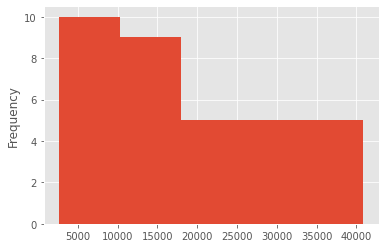

In [37]:
cdf.loc['Africa',years].plot(kind='hist',bins=5)

<AxesSubplot: ylabel='Frequency'>

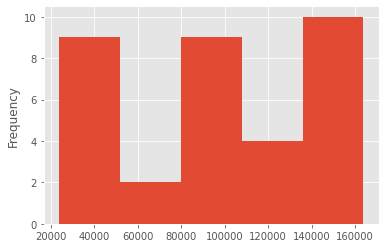

In [40]:
cdf.loc['Asia',years].plot(kind='hist',bins=5)

<AxesSubplot: ylabel='Density'>

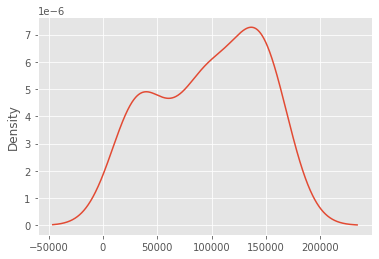

In [43]:
cdf.loc['Asia',years].plot(kind='kde')

box plot

<AxesSubplot: >

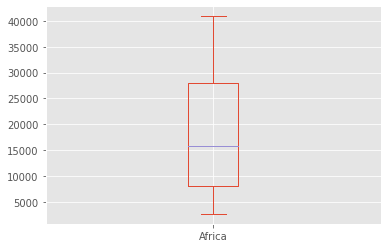

In [44]:
cdf.loc['Africa',years].plot(kind='box')

<AxesSubplot: >

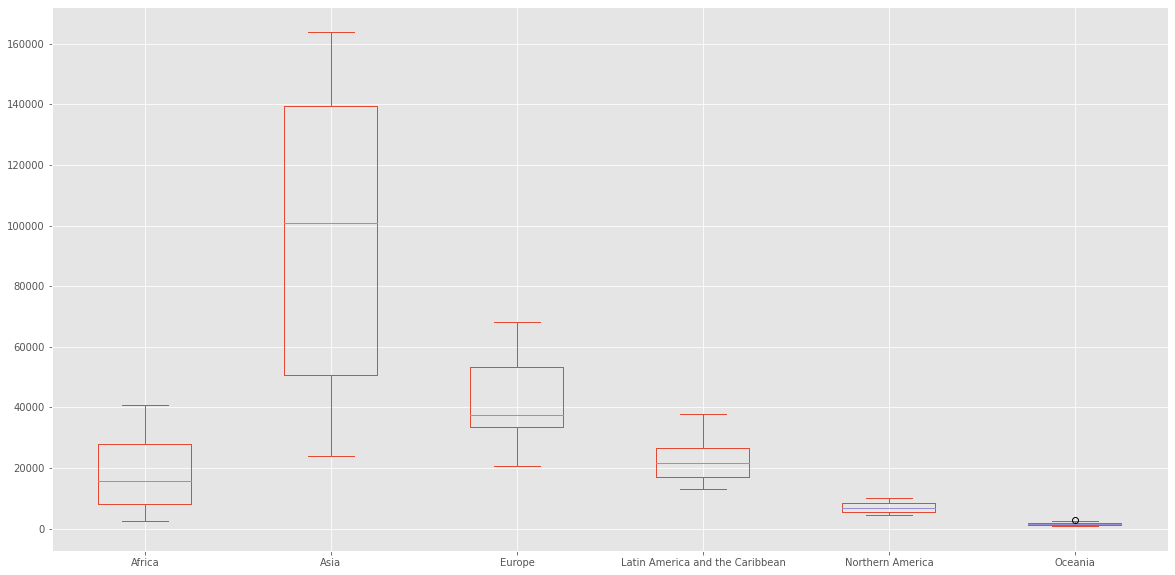

In [45]:
cdf[years].T.plot(kind='box',figsize=(20,10))